#AAI 511 - Assignment 2
By Bryan Carr

11 July 2022

University of San Diego

Prof Amit Manghani


In this assignment, we will create an artificial neural network (ANN) to predict housing prices, using the Boston Housing Dataset from Kaggle.com, available at:
https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd\

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read in the data

housing_df = pd.read_csv('/content/drive/MyDrive/AAI511/housing.csv')

In [3]:
housing_df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## 1.1 Exploratory Data Analysis

Let's begin with exploring the data. I will look at the dataframe's info/quality, to see if there are any Nulls. Then some summary statistics and a pair plot, to get a feel for what the data looks like.

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
housing_df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


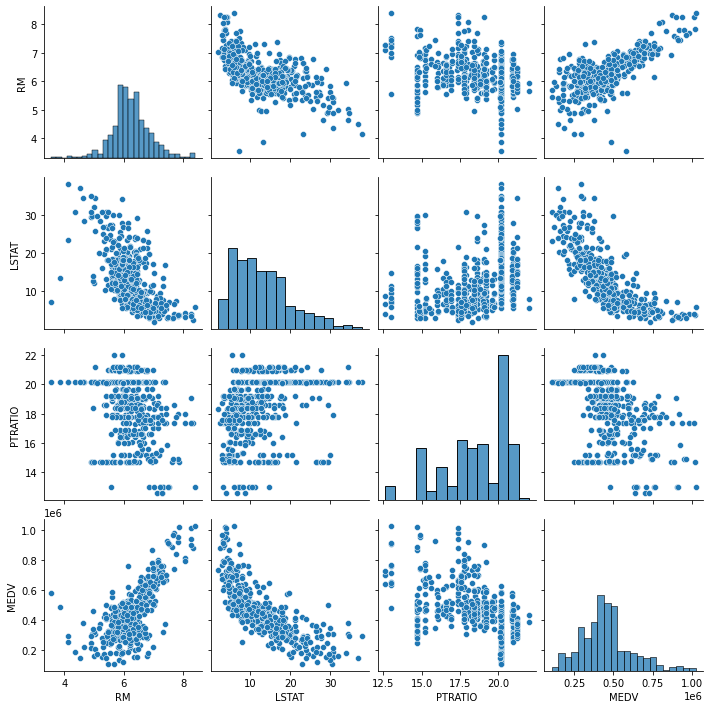

In [6]:
# Pair Plot of each variable against the others

sns.pairplot(housing_df, diag_kind="hist")

We can see from the summary stats that the data is not scaled, so we will want to do that in pre-processing.

We can also see a number of correlation-like relationships in the pair plot:

RM vs Price -- positively

L-Stat vs Price -- negatively

P-T Ratio vs Price -- slightly negative, but vague

L-Stat vs Rooms -- Negative


It is difficult to make out any other relationships. But we definitely have the makings of something that should be predictable.

## 1.2 Preprocessing and Splitting

First we will split the data into testing and training samples, with a testing size of 20%. Then we will scale both sets' X data with a Standard Scaler (fit on the Training data, of course).

In [7]:
# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Split into X and Y

X = housing_df.drop(columns='MEDV')
Y = housing_df['MEDV']

In [9]:
# Split into train and test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [10]:
# Scale the Data with a Standard Scaler
# i.e. as if it were Normally distributed
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
pd.DataFrame(x_train).describe()

,0,1,2
count,3.910000e+02,3.910000e+02,3.910000e+02
mean,8.404757e-17,1.135778e-16,1.435623e-15
std,1.001281e+00,1.001281e+00,1.001281e+00
min,-3.690669e+00,-1.537081e+00,-2.745191e+00
25%,-5.879503e-01,-7.819682e-01,-4.963153e-01
50%,-1.171877e-01,-1.792759e-01,2.533101e-01
75%,5.538995e-01,6.010078e-01,8.155292e-01
max,3.297575e+00,3.048134e+00,1.658858e+00


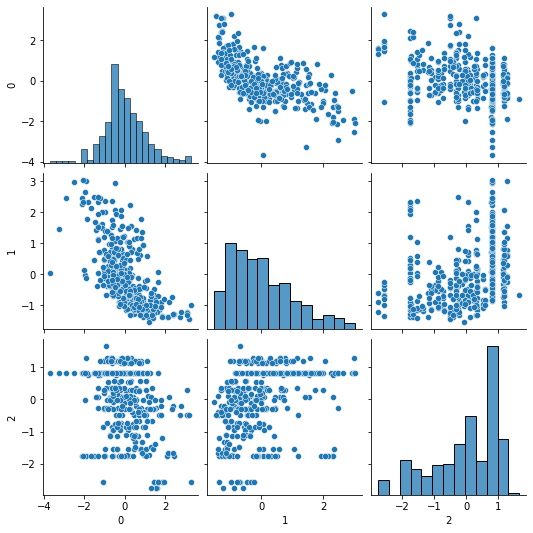

In [13]:
# Testing pair plot of Scaled data

# Pair Plot of each variable against the others

sns.pairplot(pd.DataFrame(x_train), diag_kind="hist")

## 1.3 Build the Artificial Neural Network

As the data seems fairly simple and features several key correlations, I will aim to build a simple network. I think two layers should be enough, and 20 nodes in each layer. I will also use the ReLU activation function, for its quick computation and simplicity. I will use TensorFlow's libraries, as it is one of the biggest & most widespread neural network libraries, and thus represents the standard.

In [14]:
# import the ANN libraries

import tensorflow as ts
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [18]:
# Build the Model:
#   2 hidden layers of 20 nodes.
#   Output layer of 1 node

ann1 = ts.keras.Sequential([
                         Dense(20, activation='relu', name='layer1'),
                         Dense(20, activation='relu', name='layer2'),
                         Dense(1, name='output')
])

ann1.compile(optimizer='adam',
             loss = 'mse',
             metrics=['mae', 'mse'])

ValueError: ignored

In [19]:
# Fit the ANN

ann1.fit(x=x_train, y=y_train, epochs=10, verbose=1, batch_size=1, validation_split = 0.25)

Epoch 1/10
293/293 [==============================] - 2s 3ms/step - loss: 233588572160.0000 - mae: 453710.5625 - mse: 233588572160.0000 - val_loss: 253403463680.0000 - val_mae: 469205.8750 - val_mse: 253403463680.0000
Epoch 2/10
293/293 [==============================] - 1s 2ms/step - loss: 233529147392.0000 - mae: 453645.4062 - mse: 233529147392.0000 - val_loss: 253258481664.0000 - val_mae: 469059.2188 - val_mse: 253258481664.0000
Epoch 3/10
293/293 [==============================] - 1s 4ms/step - loss: 233253502976.0000 - mae: 453362.1875 - mse: 233253502976.0000 - val_loss: 252783362048.0000 - val_mae: 468591.5938 - val_mse: 252783362048.0000
Epoch 4/10
293/293 [==============================] - 2s 7ms/step - loss: 232629518336.0000 - mae: 452714.4062 - mse: 232629518336.0000 - val_loss: 251883388928.0000 - val_mae: 467713.9062 - val_mse: 251883388928.0000
Epoch 5/10
293/293 [==============================] - 3s 10ms/step - loss: 231545880576.0000 - mae: 451627.6562 - mse: 231545880

We can see that this simple model settled in to a mean absolute error of approx $$60k for both training and validation. With a mean house price of $454k, that is quite significant (over 10%).

Let's predict based on our Test data, calculate the R^2 score, and plot both.

In [20]:
ann1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (1, 20)                   80        
                                                                 
 layer2 (Dense)              (1, 20)                   420       
                                                                 
 output (Dense)              (1, 1)                    21        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


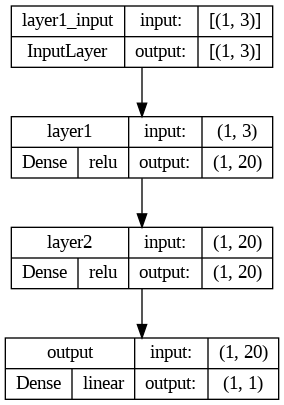

In [23]:
ts.keras.utils.plot_model(ann1,
                          show_shapes=True,
                          show_layer_activations=True)

In [ ]:
ann1_pred = ann1.predict(x=x_test)

In [ ]:
from sklearn.metrics import r2_score

ann1_r2 = r2_score(y_test, ann1_pred)
ann1_r2

0.7349128768201927

In [ ]:
# Build a Dataframe with the results, to plot

ann1_results_df = pd.DataFrame()
ann1_results_df['y_test'] = y_test
ann1_results_df['ANN_prediction'] = ann1_pred


Text(0.5, 1.0, 'Figure 2: Predicted vs Actual Housing Prices, for First ANN')

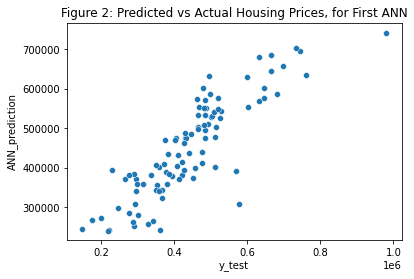

In [ ]:
sns.scatterplot(data = ann1_results_df, x='y_test', y='ANN_prediction')
plt.title('Figure 2: Predicted vs Actual Housing Prices, for First ANN')

We can clearly see a decent correlation, but some outliers. In particular, the more expensive houses are predicted too low, and the lower-priced houses are not grouped very tightly.

## 1.4 More Complex Model

Let's build a second, more complex model, to see if we can achieve a better result. We will use more nodes, a third layer, and more epochs. I will try out a 'pyramid' shaped model, with decreasing numbers of layers. I will also do more tracking of the training, so that we can plot it.

In [ ]:
# Build the Model:
#   3 hidden layers of 90-60-30 nodes.
#   Output layer of 1 node

ann2 = ts.keras.Sequential([
                            Dense(90, activation='relu', name='layer1'),
                            Dense(60, activation='relu', name='layer2'),
                            Dense(30, activation='relu', name='layer3'),
                            Dense(1, name='output')])

ann2.compile(optimizer='adam',
             loss = 'mse',
             metrics=['mae', 'mse'])

In [ ]:
# Fit the ANN

fit_history = ann2.fit(x=x_train, y=y_train, epochs=200, verbose=1, batch_size=1, validation_split = 0.25)

Epoch 1/200
293/293 [==============================] - 1s 3ms/step - loss: 233142943744.0000 - mae: 453256.8438 - mse: 233142943744.0000 - val_loss: 250733182976.0000 - val_mae: 466576.6250 - val_mse: 250733182976.0000
Epoch 2/200
293/293 [==============================] - 1s 3ms/step - loss: 214068363264.0000 - mae: 432951.1562 - mse: 214068363264.0000 - val_loss: 196804870144.0000 - val_mae: 410589.5938 - val_mse: 196804870144.0000
Epoch 3/200
293/293 [==============================] - 1s 3ms/step - loss: 115352944640.0000 - mae: 310272.5938 - mse: 115352944640.0000 - val_loss: 53472546816.0000 - val_mae: 204077.3281 - val_mse: 53472546816.0000
Epoch 4/200
293/293 [==============================] - 1s 3ms/step - loss: 20386668544.0000 - mae: 111606.6016 - mse: 20386668544.0000 - val_loss: 7746988544.0000 - val_mae: 62739.2539 - val_mse: 7746988544.0000
Epoch 5/200
293/293 [==============================] - 1s 3ms/step - loss: 6821075968.0000 - mae: 64304.8672 - mse: 6821075968.0000 -

In [ ]:
ann2_hist = pd.DataFrame(fit_history.history)
ann2_hist['rmse'] = np.sqrt(ann2_hist['mse'])
ann2_hist['val_rmse'] = np.sqrt(ann2_hist['val_mse'])
ann2_hist['epochs'] = ann2_hist.index

ann2_hist

,loss,mae,mse,val_loss,val_mae,val_mse,rmse,val_rmse,epochs
0,2.331429e+11,453256.843750,2.331429e+11,2.507332e+11,466576.625000,2.507332e+11,482848.779375,500732.646206,0
1,2.140684e+11,432951.156250,2.140684e+11,1.968049e+11,410589.593750,1.968049e+11,462675.224390,443626.949299,1
2,1.153529e+11,310272.593750,1.153529e+11,5.347255e+10,204077.328125,5.347255e+10,339636.488970,231241.317277,2
3,2.038667e+10,111606.601562,2.038667e+10,7.746989e+09,62739.253906,7.746989e+09,142781.891513,88016.978726,3
4,6.821076e+09,64304.867188,6.821076e+09,6.397659e+09,61113.019531,6.397659e+09,82589.805473,79985.365061,4
...,...,...,...,...,...,...,...,...,...
195,4.588441e+09,52098.093750,4.588441e+09,5.285025e+09,54376.964844,5.285025e+09,67738.029024,72698.179344,195
196,4.642128e+09,52129.316406,4.642128e+09,4.954593e+09,51257.597656,4.954593e+09,68133.166549,70388.868211,196
197,4.668085e+09,52557.113281,4.668085e+09,5.007093e+09,52098.078125,5.007093e+09,68323.387270,70760.817180,197
198,4.651668e+09,52294.988281,4.651668e+09,5.025154e+09,52292.644531,5.025154e+09,68203.141277,70888.317345,198


We can see the model converged very quickly - the simple model took about 45 epochs to reach 60k error, while this more complex one was approaching that around the 5th epoch. It also settles down to a lower error of around 52k.

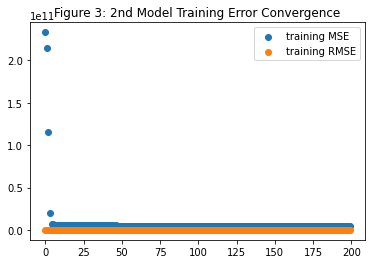

In [ ]:
#sns.scatterplot(data=ann2_hist, x='epochs', y='vals', hue='cols')
plt.scatter(x=ann2_hist['epochs'], y=ann2_hist['mse'], label='training MSE')
plt.scatter(x=ann2_hist['epochs'], y=ann2_hist['rmse'], label='training RMSE')

plt.title('Figure 3: 2nd Model Training Error Convergence')
plt.legend()
plt.show()

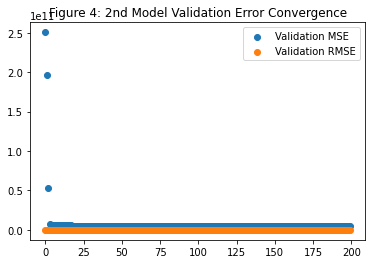

In [ ]:
plt.scatter(x=ann2_hist['epochs'], y=ann2_hist['val_mse'], label='Validation MSE')
plt.scatter(x=ann2_hist['epochs'], y=ann2_hist['rmse'], label='Validation RMSE')

plt.title('Figure 4: 2nd Model Validation Error Convergence')
plt.legend()
plt.show()

Let's proceed with checking the Predictions and R2 Score, as before.

In [ ]:
ann2_pred = ann2.predict(x_test)

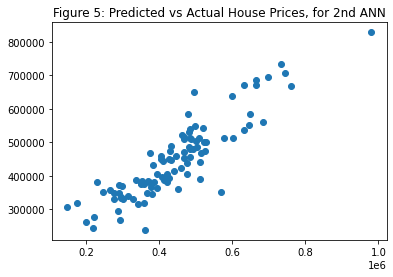

In [ ]:
plt.scatter(x=y_test, y=ann2_pred)
plt.title('Figure 5: Predicted vs Actual House Prices, for 2nd ANN')
plt.show()

In [ ]:
ann2_r2 = r2_score(y_test, ann2_pred)
ann2_r2

0.7860804158121992

We are still only seeing a mediocre R2 score of 0.786. We should try to do better one more time.

## 1.5 Wider and Deeper Model

Let's go ahead and build a wider still and deeper still model, something with a more box-like architecture. Additional epochs have not proven as useful, so I will reduce those back down to 100, and go with 5x 100-node layers. I will also try the RMS Prop optimization algorithm.

In [ ]:
# Build the Model:
#   5 hidden layers of 100 nodes each
#   Output layer of 1 node

ann3 = ts.keras.Sequential([
                            Dense(100, activation='relu', name='layer1'),
                            Dense(100, activation='relu', name='layer2'),
                            Dense(100, activation='relu', name='layer3'),
                            Dense(100, activation='relu', name='layer4'),
                            Dense(100, activation='relu', name='layer5'),
                            Dense(1, name='output')])

ann3.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics=['mae', 'mse'])

In [ ]:
# Fit the ANN

fit_history = ann3.fit(x=x_train, y=y_train, epochs=100, verbose=1, batch_size=1, validation_split = 0.25)

Epoch 1/100
293/293 [==============================] - 4s 7ms/step - loss: 153214353408.0000 - mae: 330612.7188 - mse: 153214353408.0000 - val_loss: 10765357056.0000 - val_mae: 75401.1484 - val_mse: 10765357056.0000
Epoch 2/100
293/293 [==============================] - 2s 7ms/step - loss: 9763045376.0000 - mae: 76645.7031 - mse: 9763045376.0000 - val_loss: 6863313920.0000 - val_mae: 60555.7109 - val_mse: 6863313920.0000
Epoch 3/100
293/293 [==============================] - 1s 3ms/step - loss: 7799372800.0000 - mae: 69185.0000 - mse: 7799372800.0000 - val_loss: 5824139264.0000 - val_mae: 53984.2305 - val_mse: 5824139264.0000
Epoch 4/100
293/293 [==============================] - 1s 4ms/step - loss: 7011203072.0000 - mae: 65088.9883 - mse: 7011203072.0000 - val_loss: 5620153344.0000 - val_mae: 53457.7031 - val_mse: 5620153344.0000
Epoch 5/100
293/293 [==============================] - 1s 4ms/step - loss: 6459009536.0000 - mae: 63202.5117 - mse: 6459009536.0000 - val_loss: 5581431808.00

We can see that the network converged quickly to under 60k error. However, the validation error fluctuated substantially, and it was not able to get below 50k error (again, just over 10% of the mean house price) in either training or validation. This is likely a sign of overfitting - this model is too complex, and overfits slightly with every new epoch.

Let's check the scoring, and plot the predicted and expected prices once again.

In [ ]:
ann3_predict = ann3.predict(x=x_test)

In [ ]:
ann3_r2 = r2_score(y_test, ann3_predict)
ann3_r2

0.8088240747631212

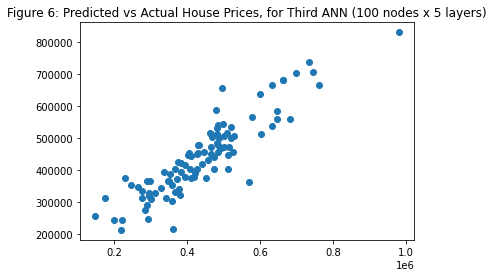

In [ ]:
plt.scatter(x=y_test, y=ann3_predict)
plt.title('Figure 6: Predicted vs Actual House Prices, for Third ANN (100 nodes x 5 layers)')
plt.show()

It seems I am wrong about the overfitting, and happily so. This model is giving us a better prediction, with a R2 of 0.809. The plot also shows less severe outliers, as we would expect for improved performance. Overall, it looks a bit like the Price-vs-Rooms graphs from the Pair Plot earlier.

## 1.6 An Even Deeper Model

Let's make another attempt, with a much deeper model. I will choose 60 nodes and 10 layers deep, with the same RMS Prop optimizer which gave us some success.

In [ ]:
# Build the Model:
#   10 hidden layers of 60 nodes each
#   Output layer of 1 node

ann4 = ts.keras.Sequential([
                            Dense(60, activation='relu', name='layer1'),
                            Dense(60, activation='relu', name='layer2'),
                            Dense(60, activation='relu', name='layer3'),
                            Dense(60, activation='relu', name='layer4'),
                            Dense(60, activation='relu', name='layer5'),
                            Dense(60, activation='relu', name='layer6'),
                            Dense(60, activation='relu', name='layer7'),
                            Dense(60, activation='relu', name='layer8'),
                            Dense(60, activation='relu', name='layer9'),
                            Dense(60, activation='relu', name='layer10'),
                            Dense(1, name='output')])

ann4.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics=['mae', 'mse'])

In [ ]:
# Fit the ANN

fit_history = ann4.fit(x=x_train, y=y_train, epochs=100, verbose=1, batch_size=1, validation_split = 0.25)

Epoch 1/100
293/293 [==============================] - 3s 5ms/step - loss: 66715480064.0000 - mae: 182737.8281 - mse: 66715480064.0000 - val_loss: 10152801280.0000 - val_mae: 74288.4844 - val_mse: 10152801280.0000
Epoch 2/100
293/293 [==============================] - 1s 5ms/step - loss: 12197474304.0000 - mae: 86715.6797 - mse: 12197474304.0000 - val_loss: 7280358912.0000 - val_mae: 60520.6992 - val_mse: 7280358912.0000
Epoch 3/100
293/293 [==============================] - 1s 4ms/step - loss: 10680059904.0000 - mae: 79549.5156 - mse: 10680059904.0000 - val_loss: 11014160384.0000 - val_mae: 83114.0312 - val_mse: 11014160384.0000
Epoch 4/100
293/293 [==============================] - 1s 5ms/step - loss: 8858332160.0000 - mae: 73764.5469 - mse: 8858332160.0000 - val_loss: 8163804160.0000 - val_mae: 63348.4219 - val_mse: 8163804160.0000
Epoch 5/100
293/293 [==============================] - 1s 5ms/step - loss: 7714984960.0000 - mae: 69457.4375 - mse: 7714984960.0000 - val_loss: 730408601

In [ ]:
ann4_pred = ann4.predict(x_test)

In [ ]:
ann4_r2 = r2_score(y_test, ann4_pred)
ann4_r2

0.7474065907311653

Our model is less accurate, despite being much deeper. It would seem that we need the increased number of nodes early on in our model.

## 1.7 A Wider Model

Let's try a wider model than ever before, with 200 nodes. We will try with only a few layers, to keep some simplicity. As before, we will use a max of 100 epochs. I will also try a larger batch size, for something different.

In [ ]:
# Build the Model:
#   3 hidden layers of 200 nodes each
#   Output layer of 1 node

ann5 = ts.keras.Sequential([
                            Dense(200, activation='relu', name='layer1'),
                            Dense(200, activation='relu', name='layer2'),
                            Dense(200, activation='relu', name='layer3'),
                            Dense(1, name='output')])

ann5.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics=['mae', 'mse'])

In [ ]:
# Fit the ANN

fit_history = ann5.fit(x=x_train, y=y_train, epochs=100, verbose=1, batch_size=10, validation_split = 0.25)

Epoch 1/100
30/30 [==============================] - 2s 19ms/step - loss: 233556918272.0000 - mae: 453675.5312 - mse: 233556885504.0000 - val_loss: 253271425024.0000 - val_mae: 469078.3750 - val_mse: 253271425024.0000
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 233202794496.0000 - mae: 453307.4375 - mse: 233202794496.0000 - val_loss: 252574253056.0000 - val_mae: 468407.2188 - val_mse: 252574253056.0000
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 232159936512.0000 - mae: 452245.8750 - mse: 232159936512.0000 - val_loss: 250950189056.0000 - val_mae: 466844.3750 - val_mse: 250950189056.0000
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 230066012160.0000 - mae: 450095.0000 - mse: 230066012160.0000 - val_loss: 247825416192.0000 - val_mae: 463859.8750 - val_mse: 247825416192.0000
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 226381791232.0000 - mae: 446292.0000 - mse: 226381791232

In [ ]:
ann5_pred = ann5.predict(x_test)

In [ ]:
ann5_r2 = r2_score(y_test, ann5_pred)
ann5_r2

0.7714498501486486

A lower R^2 score than our best yet of 80.9%. What if we try with single batch sizes, passing each point through?

In [ ]:
# Build the Model:
#   3 hidden layers of 200 nodes each
#   Output layer of 1 node

ann6 = ts.keras.Sequential([
                            Dense(200, activation='relu', name='layer1'),
                            Dense(200, activation='relu', name='layer2'),
                            Dense(200, activation='relu', name='layer3'),
                            Dense(1, name='output')])

ann6.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics=['mae', 'mse'])

In [ ]:
# Fit the ANN

fit_history = ann6.fit(x=x_train, y=y_train, epochs=100, verbose=1, batch_size=1, validation_split = 0.25)

Epoch 1/100
293/293 [==============================] - 4s 7ms/step - loss: 228800561152.0000 - mae: 448702.7500 - mse: 228800561152.0000 - val_loss: 232695021568.0000 - val_mae: 447341.3125 - val_mse: 232695021568.0000
Epoch 2/100
293/293 [==============================] - 2s 6ms/step - loss: 152258740224.0000 - mae: 353598.2812 - mse: 152258740224.0000 - val_loss: 75668766720.0000 - val_mae: 235964.4062 - val_mse: 75668766720.0000
Epoch 3/100
293/293 [==============================] - 1s 5ms/step - loss: 19342436352.0000 - mae: 102536.2578 - mse: 19342436352.0000 - val_loss: 6910006784.0000 - val_mae: 63344.6953 - val_mse: 6910006784.0000
Epoch 4/100
293/293 [==============================] - 2s 5ms/step - loss: 6503116288.0000 - mae: 63468.1562 - mse: 6503116288.0000 - val_loss: 6532411392.0000 - val_mae: 62393.1953 - val_mse: 6532411392.0000
Epoch 5/100
293/293 [==============================] - 1s 3ms/step - loss: 6350701568.0000 - mae: 62712.5039 - mse: 6350701568.0000 - val_loss:

In [ ]:
ann6_pred = ann6.predict(x_test)

ann6_r2 = r2_score(y_test, ann6_pred)
ann6_r2

0.7862087140511242

## 1.8 Summarizing our Results

Let's plot our R^2 score results against some of the key factors we've varied

In [ ]:
# build a dataframe for our results

results_df = pd.DataFrame(columns=['r2', 'max width', 'depth', 'nodes'])
results_df.loc[0] = [ann1_r2, 20, 2, 20*2]
results_df.loc[1] = [ann2_r2, 90, 3, 180]
results_df.loc[2] = [ann3_r2, 100, 5, 500]
results_df.loc[3] = [ann4_r2, 60, 10, 600]
results_df.loc[4] = [ann5_r2, 200, 3, 3*200]
results_df.loc[5] = [ann6_r2, 200, 3, 600]

results_df

,r2,max width,depth,nodes
0,0.734913,20.0,2.0,40.0
1,0.786080,90.0,3.0,180.0
2,0.808824,100.0,5.0,500.0
3,0.747407,60.0,10.0,600.0
4,0.771450,200.0,3.0,600.0
5,0.786209,200.0,3.0,600.0


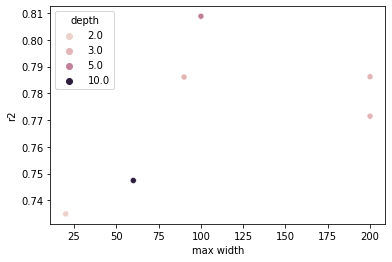

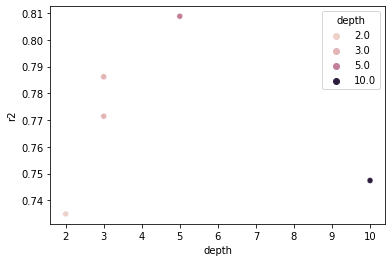

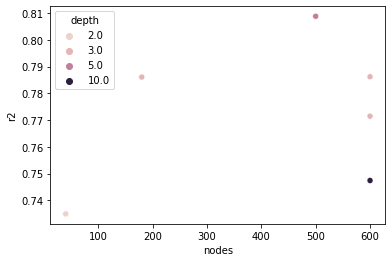

In [ ]:
# Plot the results 

for i in ['max width', 'depth', 'nodes']:
  sns.scatterplot(data=results_df, x=i, y='r2', hue='depth')
  plt.show()

We can see that we need both increasing width and depth to improve the results. The shallow-but-wide later models (ann5 and ann6) and the very deep but narrower model (ann4) all have 600 nodes, but are being outperformed by the 100x5 model (ann3)

# 1.9 A Final attempt: Wide and Deep

I will create one last model, trying to extrapolate based on the performance we've seen. Ignoring the furthest right points as outliers, it looks like both a width of 125 and a depth of 7 might be succesful in the range we are looking for (R^2 of 0.85). We've also observed that RMS Prop and a batch size of 1 are giving us the best results. Let's build that as a final attempt.

In [ ]:
# Build the Model:
#   7 hidden layers of 125 nodes each
#   Output layer of 1 node

ann7 = ts.keras.Sequential([
                            Dense(125, activation='relu', name='layer1'),
                            Dense(125, activation='relu', name='layer2'),
                            Dense(125, activation='relu', name='layer3'),
                            Dense(125, activation='relu', name='layer4'),
                            Dense(125, activation='relu', name='layer5'),
                            Dense(125, activation='relu', name='layer6'),
                            Dense(125, activation='relu', name='layer7'),
                            Dense(1, name='output')])

ann7.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics=['mae', 'mse'])

In [ ]:
# Fit the ANN

fit_history = ann7.fit(x=x_train, y=y_train, epochs=100, verbose=1, batch_size=1, validation_split = 0.25)

Epoch 1/100
293/293 [==============================] - 3s 7ms/step - loss: 61535924224.0000 - mae: 169585.8594 - mse: 61535924224.0000 - val_loss: 8975734784.0000 - val_mae: 68766.2109 - val_mse: 8975734784.0000
Epoch 2/100
293/293 [==============================] - 2s 7ms/step - loss: 10864576512.0000 - mae: 81841.9922 - mse: 10864576512.0000 - val_loss: 6799805440.0000 - val_mae: 59182.8828 - val_mse: 6799805440.0000
Epoch 3/100
293/293 [==============================] - 1s 5ms/step - loss: 8775900160.0000 - mae: 74383.7578 - mse: 8775900160.0000 - val_loss: 5914250240.0000 - val_mae: 53969.7109 - val_mse: 5914250240.0000
Epoch 4/100
293/293 [==============================] - 1s 4ms/step - loss: 8186591744.0000 - mae: 71329.3906 - mse: 8186591744.0000 - val_loss: 7885122560.0000 - val_mae: 63143.1641 - val_mse: 7885122560.0000
Epoch 5/100
293/293 [==============================] - 1s 4ms/step - loss: 7782345728.0000 - mae: 70012.4609 - mse: 7782345728.0000 - val_loss: 5405149696.0000

In [ ]:
# Make predictions and check the R^2 score

ann7_pred = ann7.predict(x_test)

ann7_r2 = r2_score(y_test, ann6_pred)
ann7_r2

0.7862087140511242

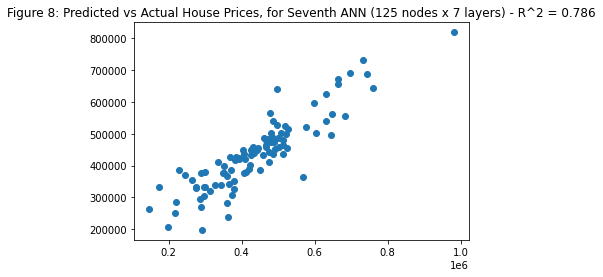

In [ ]:
plt.scatter(x=y_test, y=ann7_pred)
plt.title('Figure 8: Predicted vs Actual House Prices, for Seventh ANN (125 nodes x 7 layers) - R^2 = 0.786')
plt.show()

Unfortuantely we were not able to achieve a higher accuracy, coming in with a R^2 of approx 0.786, which is fairly average performance.

It may be that the data is too simple - with only 3 features/dimensions, it could be difficult for any function to correctly capture the relationships. I've seen housing datasets with ~10 features, and it's not hard to imagine that with more features, some of the outlying points could be described by them well. The features in our data represent the number of rooms, portion of 'working class' families in the neighbourhood, and the parent-to-teacher ratio at local schools (i.e. number of families per teacher). It is easy to imagine other important variables -- for example the age of the home; size of the lawn; and/or number of bathrooms. With more data to capture additional differences between homes, I believe a more accurate predictor could be built.
